# TRABALHO 1 - Redimensionamento de Imagem

#### 1. Reduza uma imagem de uma escala k < 1 utilizando a técnica do vizinho mais próximo

In [9]:
# Importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [10]:
def reduce(img, k):
    # Calcula a nova altura e largura
    newWidth = int(img.shape[1]*k)
    newHeight = int(img.shape[0]*k)

    # Monta uma matriz de zeros com as novas dimensões
    newImg = np.zeros((newHeight, newWidth, img.shape[2]), dtype=img.dtype)

    # Para cada ponto na nova imagem, encontra um ponto correspondente na imagem original
    for i in range(newHeight):
        for j in range(newWidth):
            newImg[i, j] = img[int(i/k), int(j/k)]

    return newImg


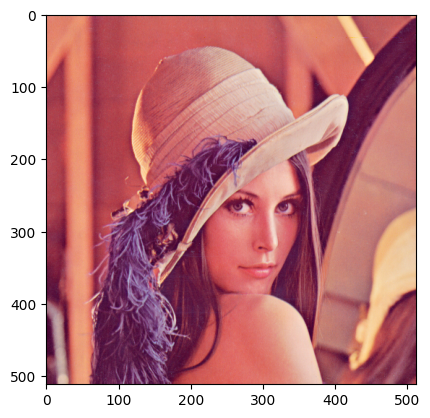

In [7]:
# Carregando uma imagem de exemplo
lenna = "/home/ramon/projects/visao/images/Lenna.png"
img = cv2.imread(lenna)
rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgbImg)

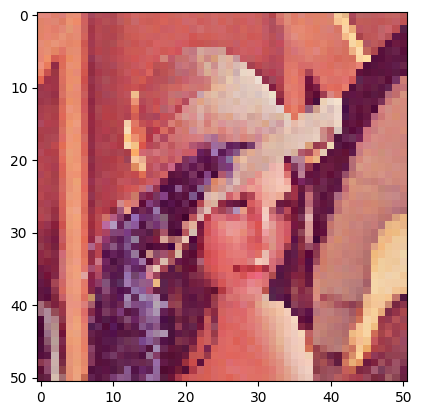

In [17]:
# Exibindo a imagem reduzida por uma escala de 0.1
newImage = reduce(rgbImg, 0.1)
plt.imshow(newImage)

#### 1.1 (bônus) Redução utilizando a média dos vizinhos

In [87]:
def reduceNeighbors(img, k):
    # Calcula a nova altura e largura
    newWidth = int(img.shape[1]*k)
    newHeight = int(img.shape[0]*k)

    # Monta uma matriz de zeros com as novas dimensões
    newImg = np.zeros((newHeight, newWidth, img.shape[2]), dtype=img.dtype)

    for i in range(newHeight):
        for j in range(newWidth):
            # Calcula a posição original na imagem de entrada
            pi = int(i / k)
            pj = int(j / k)

            # Pega o quadrado 3x3 ao redor do pixel
            neighbors = img[max(0, pi-1):min(pi+2, img.shape[0]), 
                            max(0, pj-1):min(pj+2, img.shape[1])]

            # Calcula a média dos valores
            avg_pixel = np.mean(neighbors, axis=(0, 1))

            # Define o valor médio no pixel da nova imagem
            newImg[i, j] = avg_pixel

    return newImg


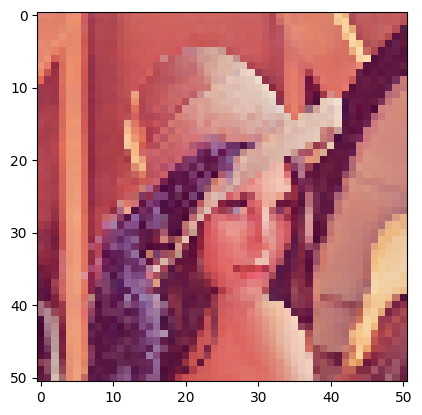

In [83]:
newImage2 = reduceNeighbors(rgbImg, 0.1)
plt.imshow(newImage2)

#### 2. Aumente uma imagem de uma escala 𝑘 = 2 (exatamente um buraco entre um par de pixels) usando interpolação de ordem zero e ordem 1

In [85]:
def augmentBy2OrderZero(img):
    # Calcula a nova altura e largura (2X)
    newWidth = img.shape[1]*2
    newHeight = img.shape[0]*2

    # Monta uma matriz de zeros com as novas dimensões
    newImg = np.zeros((newHeight, newWidth, img.shape[2]), dtype=img.dtype)

    # Preenche a nova imagem com os valores da imagem original
    for i in range(0, newHeight, 2):
        for j in range(0, newWidth, 2):
            newImg[i, j] = img[i // 2, j // 2]

    # Preenche os buracos restantes
    for i in range(newHeight):
        for j in range(newWidth):
            # Se a linha for ímpar, copia o valor da linha anterior
            if i % 2 == 1: 
                newImg[i, j] = newImg[i - 1, j]
            # Se a coluna for ímpar, copia o valor da coluna anterior
            elif j % 2 == 1: 
                newImg[i, j] = newImg[i, j - 1]

    return newImg

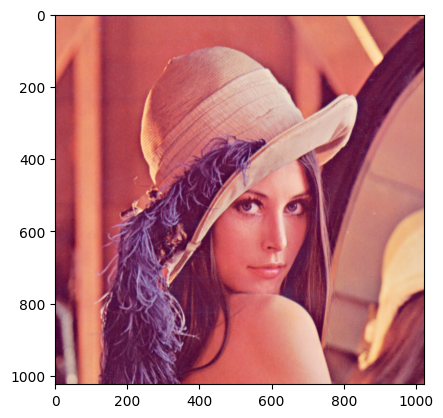

In [86]:
img2XOrder0 = augmentBy2OrderZero(rgbImg)
plt.imshow(img2XOrder0)

In [91]:
def augmentBy2OrderOne(img):
    # Calcula a nova altura e largura (2X)
    newWidth = img.shape[1]*2
    newHeight = img.shape[0]*2

    # Monta uma matriz de zeros com as novas dimensões
    newImg = np.zeros((newHeight, newWidth, img.shape[2]), dtype=img.dtype)
    
    # Preenche a nova imagem com os valores da imagem original
    for i in range(0, newHeight, 2):
        for j in range(0, newWidth, 2):
            newImg[i, j] = img[i // 2, j // 2]

    # Preenche horizontalmente as linhas com valores
    for i in range(0, newHeight, 2):
        for j in range(1, newWidth, 2):
            if j + 1 < newWidth:
                # Converte para float16 para evitar overflow e calcula a média
                newImg[i, j] = np.uint8((newImg[i, j - 1].astype(np.float16) + newImg[i, j + 1].astype(np.float16)) / 2)
            else:
                # Quando chega ao final da linha e não tem valor posterior, pega-se o valor anterior
                newImg[i, j] = newImg[i, j - 1]

    # Preenche verticalmente as linhas que sobraram
    for i in range(1, newHeight, 2): 
        for j in range(0, newWidth):
            if i + 1 < newHeight:
                # Converte para float16 e calcula a média dos vizinhos
                newImg[i, j] = np.uint8((newImg[i - 1, j].astype(np.float16) + newImg[i + 1, j].astype(np.float16)) / 2)
            else:
                newImg[i, j] = newImg[i - 1, j]

    return newImg

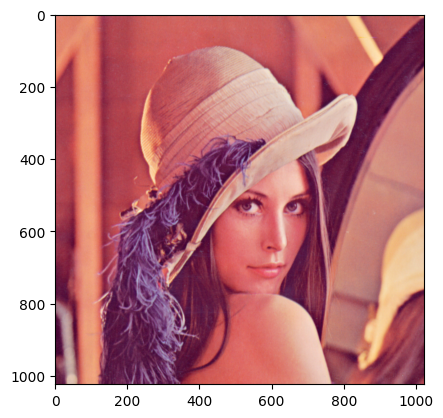

In [92]:
img2XOrder1 = augmentBy2OrderOne(rgbImg)
plt.imshow(img2XOrder1)

#### 3. Aumente uma imagem de uma escala 𝑘 inteira usando interpolação de ordem zero e ordem 1

In [93]:
def augmentByKOrderZero(img, k):
    # Calcula a nova altura e largura
    newWidth = img.shape[1]*k
    newHeight = img.shape[0]*k

    # Monta uma matriz de zeros com as novas dimensões
    newImg = np.zeros((newHeight, newWidth, img.shape[2]), dtype=img.dtype)

    # Preenche a nova imagem com os valores da imagem original
    for i in range(0, newHeight, k):
        for j in range(0, newWidth, k):
            newImg[i, j] = img[i // k, j // k]

    # Copiando os valores dos pixels para preencher os espaços vazios
    for i in range(newHeight):
        for j in range(newWidth):
            # Se a linha não for um múltiplo de k, copia o valor da linha anterior
            if i % k != 0: 
                newImg[i, j] = newImg[i - 1, j]
            # Se a coluna não for um múltiplo de k, copia o valor da coluna anterior
            elif j % k != 0:  
                newImg[i, j] = newImg[i, j - 1]

    return newImg


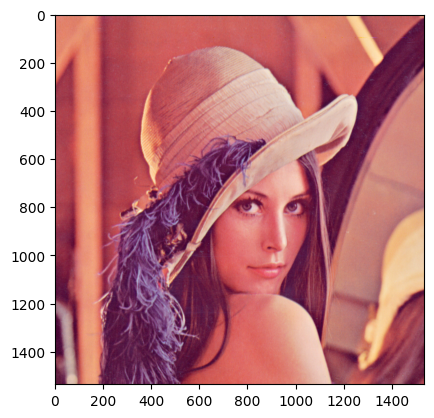

In [94]:
imgkordem0 = augmentByKOrderZero(rgbImg, 3)
plt.imshow(imgkordem0)

In [98]:
def augmentByKOrderOne(img, k):
    # Calcula a nova altura e largura
    newWidth = img.shape[1]*k
    newHeight = img.shape[0]*k

    # Monta uma matriz de zeros com as novas dimensões
    # Utiliza-se float16 para preservar o sinal negativo no calculo do delta
    newImg = np.zeros((newHeight, newWidth, img.shape[2]), dtype=np.float16)
    
    # Preenche a nova imagem com os valores da imagem original
    for i in range(0, newHeight, k):
        for j in range(0, newWidth, k):
            newImg[i, j] = img[i // k, j // k].astype(np.float16)

    # Preenche as linhas múltiplas de k
    for i in range(0, newHeight, k):
        for j in range(0, newWidth - k, k): 
            # Calcula o delta entre vo e v1 
            delta = (newImg[i, j + k] - newImg[i, j]) / k
            # Preenche os pixels entre vo e v1
            for a in range(1, k):
                newImg[i, j + a] = newImg[i, j] + a * delta
        # Se não houver v1 para calcular o delta, preenche o resto com o último valor
        if j + k >= newWidth: 
            for a in range(1, k):
                newImg[i, j + a] = newImg[i, j]

    # Preenche o resto das linhas
    for i in range(0, newHeight - k, k):  
        for j in range(newWidth):
            # Calcula o delta entre valores de duas linhas
            delta = (newImg[i + k, j] - newImg[i, j]) / k
            # Preenche entre essas duas linhas, na coluna
            for b in range(1, k):
                newImg[i + b, j] = newImg[i, j] + b * delta
        # Se não houver v1 para calcular o delta, preenche o resto com o último valor
        if i + k >= newHeight:
            for b in range(1, k):
                newImg[i + b, j] = newImg[i, j]

    # Converte a imagem final para uint8 antes de retornar
    return np.clip(newImg, 0, 255).astype(np.uint8)


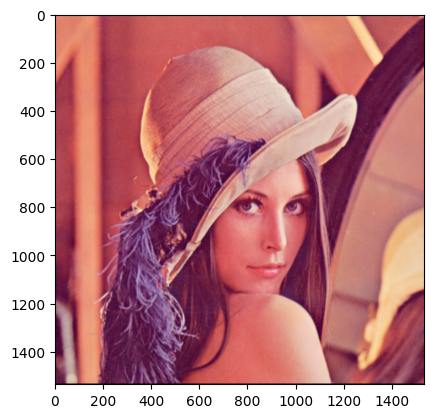

In [99]:
imgkorder1 = augmentByKOrderOne(rgbImg, 3)
plt.imshow(imgkorder1)

#### 3.1 (bônus) Aumente de uma escala 𝑘 ≥ 1 real utilizando interpolação de ordem 1

In [2]:
def augmentByRealOrderOne(img, k):
    newWidth = int(img.shape[1] * k)
    newHeight = int(img.shape[0] * k)

    # Monta uma matriz de zeros com as novas dimensões
    newImg = np.zeros((newHeight, newWidth, img.shape[2]), dtype=np.float16)

    for i in range(newHeight):
        for j in range(newWidth):
            # Coordenadas inversas na imagem original
            orig_i = i / k
            orig_j = j / k

            # Índices inteiros dos 4 vizinhos
            i0, j0 = int(np.floor(orig_i)), int(np.floor(orig_j))
            i1, j1 = min(i0 + 1, img.shape[0] - 1), min(j0 + 1, img.shape[1] - 1)

            # Pesos de interpolação (fator entre os vizinhos)
            di, dj = orig_i - i0, orig_j - j0

            # Interpolação bilinear
            top_left = img[i0, j0].astype(np.float16)
            top_right = img[i0, j1].astype(np.float16)
            bottom_left = img[i1, j0].astype(np.float16)
            bottom_right = img[i1, j1].astype(np.float16)

            # Interpolação nas linhas superior e inferior
            top_interp = top_left + dj * (top_right - top_left)
            bottom_interp = bottom_left + dj * (bottom_right - bottom_left)

            # Interpolação na coluna
            newImg[i, j] = top_interp + di * (bottom_interp - top_interp)

    # Converte a imagem final para uint8 antes de retornar
    return np.clip(newImg, 0, 255).astype(np.uint8)

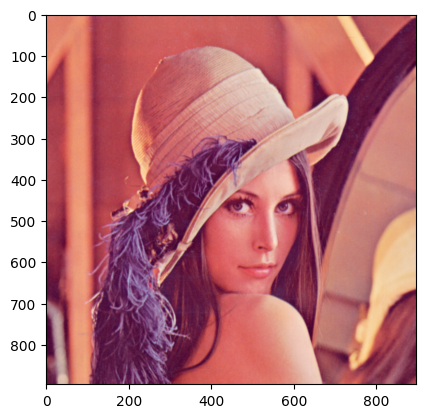

In [8]:
imgRealorder1 = augmentByRealOrderOne(rgbImg, 1.75)
plt.imshow(imgRealorder1)